# Experiment 7.3

##  Implement and demonstrate  Single, Multi variable and Polynomial Regression for a given set of training data stored in a .CSV file and evaluate the accuracy.

[0 1 2 3 4 5 6 7 8 9]
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]
 [ 1.  9. 81.]]


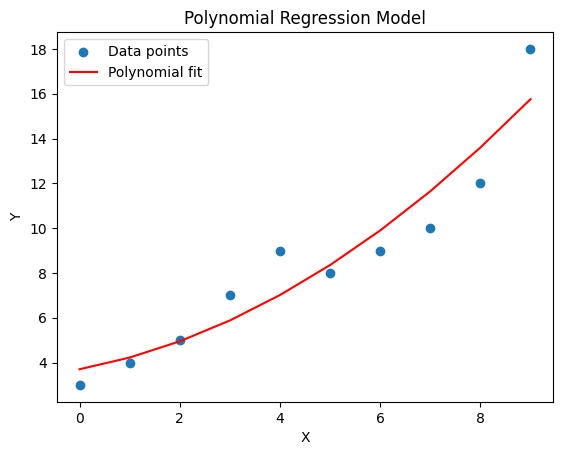

In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation (though not used in this snippet)
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.preprocessing import PolynomialFeatures  # For polynomial feature transformation

# Create a range of x values from 0 to 9
x = np.arange(0, 10)

# Define corresponding y values
y = [3, 4, 5, 7, 9, 8, 9, 10, 12, 18]
print(x)  # Print x values

# Initialize PolynomialFeatures with degree 2 for quadratic features
poly = PolynomialFeatures(degree=2)

# Transform x to include polynomial features (x and x^2)
poly_features = poly.fit_transform(x.reshape(-1, 1))
print(poly_features)  # Print the transformed features

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model with the polynomial features and target y
model.fit(poly_features, y)

# Predict y values using the fitted model
y_pred = model.predict(poly_features)

# Plotting the results
plt.title('Polynomial Regression Model')  # Set the title of the plot
plt.scatter(x, y, label='Data points')  # Scatter plot of the original data
plt.xlabel('X')  # Label for x-axis
plt.ylabel('Y')  # Label for y-axis
plt.plot(x, y_pred, c='red', label='Polynomial fit')  # Plot the polynomial regression line
plt.legend()  # Show legend to distinguish between data points and the fit line
plt.show()  # Display the plot


# Following Cells are not required for the Experiment

# Evaluate Model Performance

In [3]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 1.70


# Higher-Degree Polynomial Fits

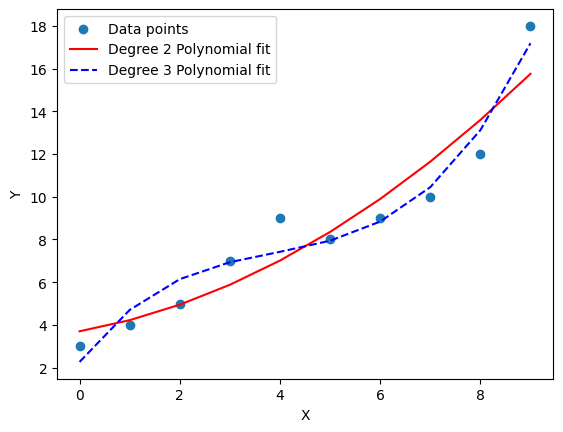

In [4]:
poly_higher = PolynomialFeatures(degree=3)  # Try cubic
poly_features_higher = poly_higher.fit_transform(x.reshape(-1, 1))
model_higher = LinearRegression()
model_higher.fit(poly_features_higher, y)
y_pred_higher = model_higher.predict(poly_features_higher)

# Plot to compare different polynomial degrees
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, c='red', label='Degree 2 Polynomial fit')
plt.plot(x, y_pred_higher, c='blue', linestyle='--', label='Degree 3 Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Visualize Residuals

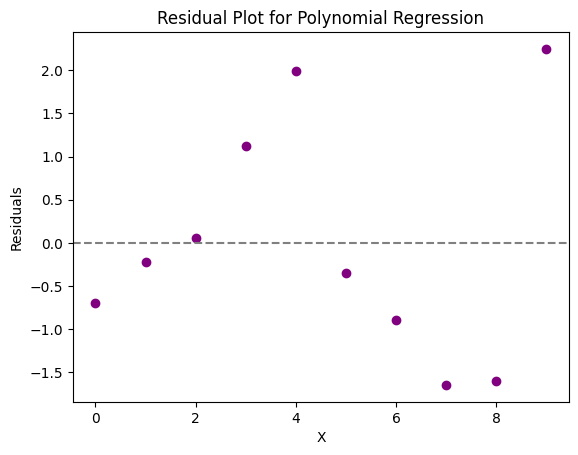

In [5]:
residuals = y - y_pred
plt.scatter(x, residuals, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Regression')
plt.show()


# Plot Polynomial Curve on a Fine Scale

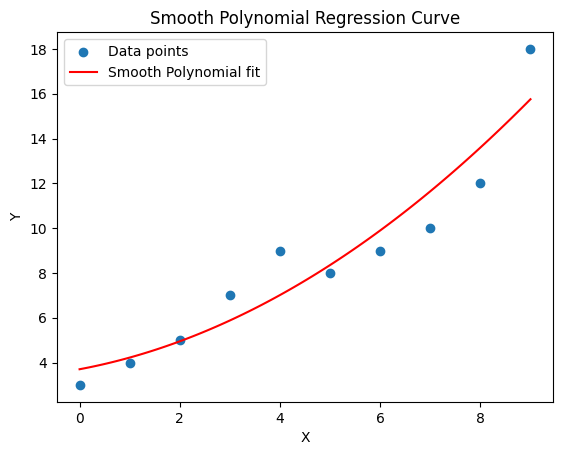

In [6]:
x_fine = np.linspace(0, 9, 100).reshape(-1, 1)
x_fine_poly = poly.fit_transform(x_fine)
y_fine_pred = model.predict(x_fine_poly)

plt.scatter(x, y, label='Data points')
plt.plot(x_fine, y_fine_pred, color='red', label='Smooth Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Polynomial Regression Curve')
plt.legend()
plt.show()


 # R-squared Score for Model Evaluation

In [7]:
r_squared = model.score(poly_features, y)
print(f'R-squared Score: {r_squared:.2f}')

R-squared Score: 0.90
